# Conhecendo seus dados e Pré-processamento
## Base de dados de características de cavalos - O animal terá que passar por uma cirurgia?

Luciana Nascimento Santana Prachedes

Primeiramente, devemos carregar os dados.

In [95]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

drive.mount('/content/drive')

columns = ['cirurgia', 'Idade', 'Número do Hospital', 'temperatura retal', 'pulso', 'frequência respiratória', 'temperatura das extremidades', 
           'pulso periférico', 'membranas mucosas', 'tempo de enchimento capilar', 'dor', 'peristaltismo', 'distensão abdominal', 'sonda nasogástrica', 
           'refluxo nasogástrico', 'refluxo nasogástrico PH', 'toque retal - fezes', 'abdômen', 'volume globular', 'proteína total', 'aparência da abdominocentese',
           'proteína total da abdocentese', 'resultado', 'lesão cirúrgica', 'tipo de lesão 1', 'tipo de lesão 2', ' tipo de lesão 3', 'n/a']
dados = pd.read_csv("/content/drive/MyDrive/Mineração de Dados/trabalho2_dados_Luciana.csv", na_values='?', names = columns)
dados.drop([0], inplace=True)

print(dados)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     cirurgia  Idade  Número do Hospital  temperatura retal  pulso  \
1           1      1              533836                NaN  100.0   
2           2      1              528169               38.2   48.0   
3           2      1              530670               37.6   88.0   
4           1      1              533871               37.5   72.0   
5           2      1              528620               36.9   50.0   
..        ...    ...                 ...                ...    ...   
208         2      1              530001               38.0   44.0   
209         2      1              528151               38.5  100.0   
210         2      1              530028               39.5   92.0   
211         1      9             5294539               38.8  184.0   
212         1      9             5297379               38.4   84.0   

     frequência respiratória  

Como o objetivo futuro é possivelmente treinar um modelo, aqui seria interessante transformar nosso valores categóricos em valores númericos, mas isso já foi feito.

Agora, vamos desconsiderar a coluna 28 pois vamos trabalhar com 27 dos atributos.

In [96]:
dados.drop(['n/a'], axis=1, inplace=True)
print(dados)

     cirurgia  Idade  Número do Hospital  temperatura retal  pulso  \
1           1      1              533836                NaN  100.0   
2           2      1              528169               38.2   48.0   
3           2      1              530670               37.6   88.0   
4           1      1              533871               37.5   72.0   
5           2      1              528620               36.9   50.0   
..        ...    ...                 ...                ...    ...   
208         2      1              530001               38.0   44.0   
209         2      1              528151               38.5  100.0   
210         2      1              530028               39.5   92.0   
211         1      9             5294539               38.8  184.0   
212         1      9             5297379               38.4   84.0   

     frequência respiratória  temperatura das extremidades  pulso periférico  \
1                        NaN                           3.0               3.0   

Algumas análises estatísticas sobre os dados:

Olhando para os valores faltantes com gráficos

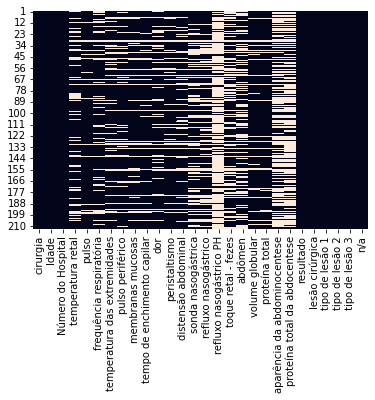

In [23]:
import seaborn as sns

sns.heatmap(dados.isnull(), cbar=False)

Olhando para os valores faltantes em números

cirurgia                           0
Idade                              0
Número do Hospital                 0
temperatura retal                 50
pulso                             15
frequência respiratória           44
temperatura das extremidades      44
pulso periférico                  40
membranas mucosas                 33
tempo de enchimento capilar       29
dor                               42
peristaltismo                     32
distensão abdominal               42
sonda nasogástrica                70
refluxo nasogástrico              66
refluxo nasogástrico PH          168
toque retal - fezes               78
abdômen                           81
volume globular                   24
proteína total                    22
aparência da abdominocentese     116
proteína total da abdocentese    132
resultado                          0
lesão cirúrgica                    0
tipo de lesão 1                    0
tipo de lesão 2                    0
 tipo de lesão 3                   0
n

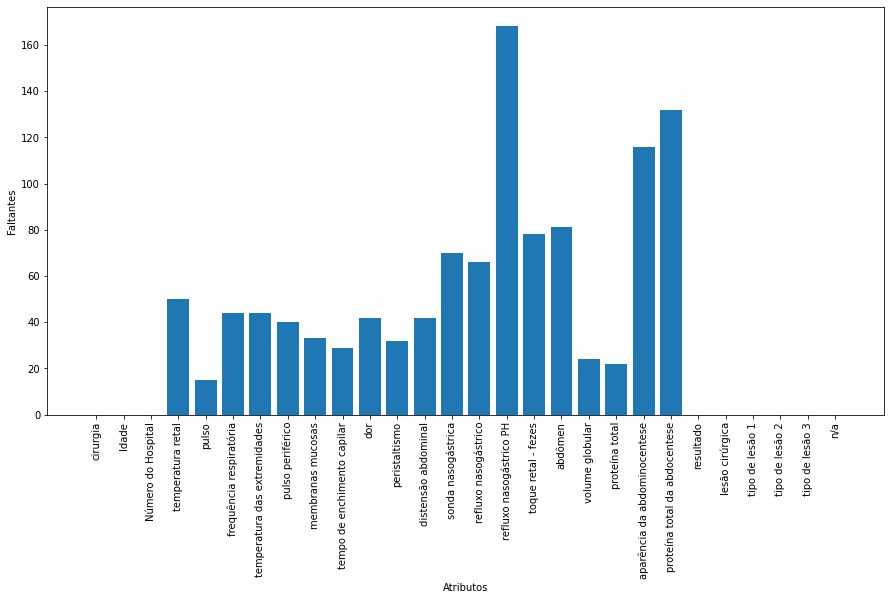

In [25]:
null = dados.isnull().sum()

plt.figure(figsize=(15,7.5))
plt.bar(range(len(null)),null)
plt.xlabel('Atributos')
plt.ylabel('Faltantes')
plt.xticks(list(range(len(dados.columns))), list(dados.columns.values), rotation='vertical')
plt.show

print(null)

Refluxo nasogástrico PH, aparência da abdominescentese e proteína total da abdocentese são os atributos com mais valores faltantes.

Selecionando os atributos contínuos para avaliações estatísticas

In [97]:
for coluna in dados.columns.values:
    if (len(dados[coluna].value_counts())> 5) and (dados[coluna].isnull().sum() > 0):
        print(coluna)

temperatura retal
pulso
frequência respiratória
membranas mucosas
refluxo nasogástrico PH
volume globular
proteína total
proteína total da abdocentese


In [98]:
dados[["temperatura retal", "pulso", "membranas mucosas", "frequência respiratória", "refluxo nasogástrico PH", "volume globular", "proteína total", "proteína total da abdocentese"]].describe()

,temperatura retal,pulso,membranas mucosas,frequência respiratória,refluxo nasogástrico PH,volume globular,proteína total,proteína total da abdocentese
count,162.000000,197.000000,179.000000,168.000000,44.000000,188.000000,190.000000,80.000000
mean,38.151235,73.923858,2.865922,30.238095,4.672727,47.412234,24.972632,3.152500
std,0.838309,29.827382,1.562881,16.256270,2.155077,10.688667,27.762751,2.029465
min,35.400000,30.000000,1.000000,10.000000,1.000000,31.500000,3.300000,0.100000
25%,37.725000,49.000000,1.000000,20.000000,2.000000,39.000000,6.600000,2.000000
50%,38.200000,66.000000,3.000000,28.000000,5.350000,45.000000,7.600000,2.100000
75%,38.500000,92.000000,4.000000,36.000000,6.625000,55.000000,60.750000,4.300000
max,40.800000,184.000000,6.000000,96.000000,7.500000,75.000000,89.000000,10.000000


A média não é representativa na maioria dos casos.

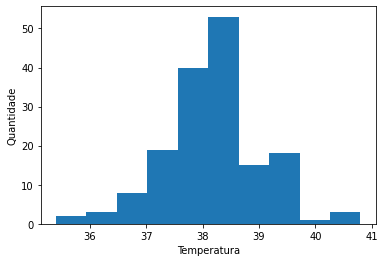

In [63]:
plt.hist(dados["temperatura retal"].dropna())
plt.xlabel("Temperatura")
plt.ylabel("Quantidade")
plt.show()

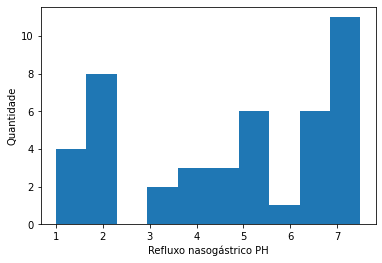

In [72]:
dados["refluxo nasogástrico PH"].describe()

plt.hist(dados["refluxo nasogástrico PH"].dropna())
plt.xlabel("Refluxo nasogástrico PH")
plt.ylabel("Quantidade")
plt.show()

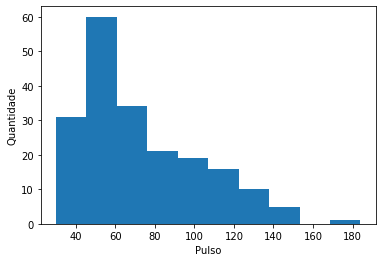

In [91]:
dados["pulso"].describe()

plt.hist(dados["pulso"].dropna())
plt.xlabel("Pulso")
plt.ylabel("Quantidade")
plt.show()

Cirurgia: o atributo principal que vai ser alvo do nosso modelo

1    128
2     84
Name: cirurgia, dtype: int64


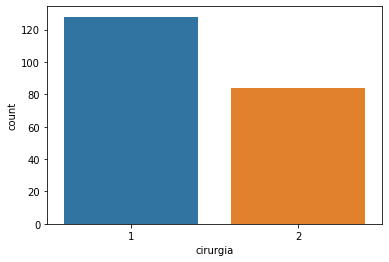

In [32]:
sns.countplot(data=dados, x="cirurgia")
print(dados.cirurgia.value_counts())


Mais da metade das instâncias foi operada (1).

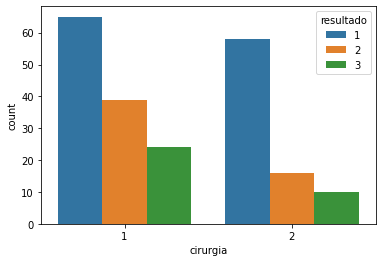

In [34]:
sns.countplot(data=dados, x="cirurgia", hue="resultado")

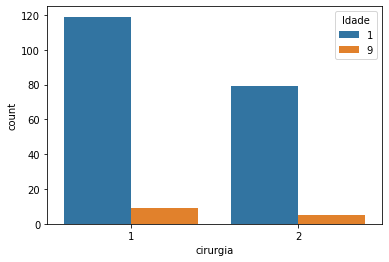

In [36]:
sns.countplot(data=dados, x="cirurgia", hue="Idade")

Existem muito mais cavalos adultos nas instâncias.

Analisando a correlação entre nosso atributo principal e os outros atributos para determinar a força de algumas relações

In [37]:
correlacao = dados.corr()
core = abs(correlacao.cirurgia.sort_values(ascending = False))
core.sort_values(ascending = False)

cirurgia                         1.000000
lesão cirúrgica                  0.622773
abdômen                          0.453645
toque retal - fezes              0.385700
distensão abdominal              0.350186
refluxo nasogástrico PH          0.342621
peristaltismo                    0.249601
dor                              0.245890
pulso periférico                 0.244374
pulso                            0.217191
aparência da abdominocentese     0.203505
membranas mucosas                0.166692
tipo de lesão 1                  0.166203
resultado                        0.163500
tempo de enchimento capilar      0.158781
frequência respiratória          0.151114
volume globular                  0.138396
proteína total da abdocentese    0.116956
temperatura das extremidades     0.104381
Número do Hospital               0.074960
tipo de lesão 2                  0.072592
n/a                              0.070553
proteína total                   0.034423
sonda nasogástrica               0

Abaixo de 0.4 já não é uma relação forte, mas vamos considerar aqui todos acima de 0.2.

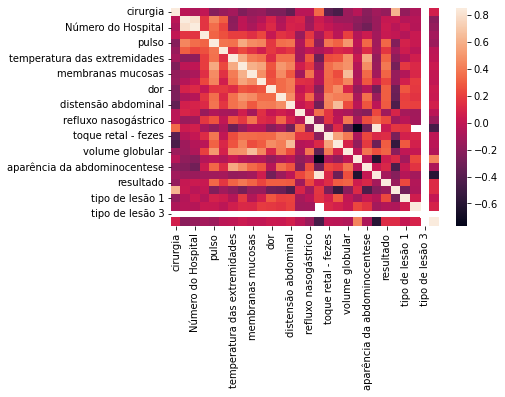

In [38]:
sns.heatmap(correlacao, vmax=0.85)

Tratamento de valores faltantes (NaN) e remoção de atributos

In [89]:
# quantidade considerável de valores faltantes serão removidos
dados.drop('refluxo nasogástrico PH', axis=1, inplace = True)
dados.drop('aparência da abdominocentese', axis=1, inplace = True)
dados.drop('proteína total da abdocentese', axis=1, inplace = True)

# baixa correlação (abaixo de 0.2) serão removidos
dados.drop('membranas mucosas', axis=1, inplace = True)
dados.drop('tipo de lesão 1', axis=1, inplace = True)
dados.drop('resultado', axis=1, inplace = True)
dados.drop('tempo de enchimento capilar', axis=1, inplace = True)
dados.drop('frequência respiratória', axis=1, inplace = True)
dados.drop('volume globular', axis=1, inplace = True)
dados.drop('Número do Hospital', axis=1, inplace = True)
dados.drop('tipo de lesão 2', axis=1, inplace = True)
dados.drop('proteína total', axis=1, inplace = True)
dados.drop('sonda nasogástrica', axis=1, inplace = True)
dados.drop('refluxo nasogástrico', axis=1, inplace = True)
dados.drop('Idade', axis=1, inplace = True)
dados.drop('temperatura retal', axis=1, inplace = True)
dados.drop(' tipo de lesão 3', axis=1, inplace = True)

In [90]:
print(dados)

     cirurgia  pulso  temperatura das extremidades  pulso periférico  dor  \
1           1  100.0                           3.0               3.0  NaN   
2           2   48.0                           2.0               NaN  3.0   
3           2   88.0                           3.0               1.0  3.0   
4           1   72.0                           2.0               1.0  2.0   
5           2   50.0                           2.0               3.0  1.0   
..        ...    ...                           ...               ...  ...   
208         2   44.0                           2.0               1.0  3.0   
209         2  100.0                           3.0               3.0  4.0   
210         2   92.0                           3.0               3.0  5.0   
211         1  184.0                           1.0               NaN  4.0   
212         1   84.0                           3.0               3.0  3.0   

     peristaltismo  distensão abdominal  toque retal - fezes  abdômen  \
1 

Preenchendo valores NaN com moda para valores categóricos e também para o único valor númerico restante (pulso), já que a média não é representativa

In [92]:
for col in dados.columns.values:
    if (dados[col].isnull().sum()>0):  
       dados[col].fillna(dados[col].mode()[0], inplace = True)

In [93]:
print(dados)

     cirurgia  pulso  temperatura das extremidades  pulso periférico  dor  \
1           1  100.0                           3.0               3.0  3.0   
2           2   48.0                           2.0               3.0  3.0   
3           2   88.0                           3.0               1.0  3.0   
4           1   72.0                           2.0               1.0  2.0   
5           2   50.0                           2.0               3.0  1.0   
..        ...    ...                           ...               ...  ...   
208         2   44.0                           2.0               1.0  3.0   
209         2  100.0                           3.0               3.0  4.0   
210         2   92.0                           3.0               3.0  5.0   
211         1  184.0                           1.0               3.0  4.0   
212         1   84.0                           3.0               3.0  3.0   

     peristaltismo  distensão abdominal  toque retal - fezes  abdômen  \
1 